# Machine Learning Engineer Nanodegree
## Andrew Doyle
## Project: Capstone

The problem I will be attempting to solve is “can unsupervised Machine Learning algorithms correctly cluster pitches thrown by a Major League Pitcher into their proper pitch type?” By better understanding the variation in the metrics tracked by Statcast (perceived velocity, spin rate, horizontal movement, and vertical movement), we can potentially better understand what it is the makes Chris Sale perform at such a high level. I will apply unsupervised clustering algorithms in my effort to accomplish this. Statcast tracks the above features for every pitch that is thrown in major league baseball, as well as the result of each pitch and numerous other metrics. The metric I will be attempting to identify is the resulting label of the pitch type.

## Getting Started

### Load the Data

The first thing to do is import all necessary libraries and then to [download Chris Sale’s dataset from Baseball Savant](https://baseballsavant.mlb.com/statcast_search?hfPT=&hfAB=&hfBBT=&hfPR=&hfZ=&stadium=&hfBBL=&hfNewZones=&hfGT=R%7C&hfC=&hfSea=2017%7C&hfSit=&player_type=pitcher&hfOuts=&opponent=&pitcher_throws=&batter_stands=&hfSA=&game_date_gt=&game_date_lt=&player_lookup%5B%5D=519242&team=&position=&hfRO=&home_road=&hfFlag=&metric_1=&hfInn=&min_pitches=0&min_results=0&group_by=name-event&sort_col=pitches&player_event_sort=api_p_release_speed&sort_order=desc&min_abs=0%23results).  I will save the file as ‘sale_pitch_data.csv’.  Once the file is downloaded it can be loaded into the iPython file the we can explore what we have.

In [32]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import math
import random
import warnings
warnings.filterwarnings('ignore')

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

print 'finished'

finished


Now that the dataset has been downloaded, we can begin by viewing the data as is, prior to any processing.

## Analysis
### Section 4 – Data Exploration

In [2]:
#Import data
try:
    data = pd.read_csv('sale_pitch_data.csv')
    print "Pitch dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Pitch dataset has 2626 samples with 78 features each.


In [3]:
# Display a description of the dataset
display(data.describe())
print data.dtypes

,release_speed,release_pos_x,release_pos_z,batter,pitcher,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,...,az,sz_top,sz_bot,release_extension,game_pk,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,at_bat_number,pitch_number
count,2626.000000,2626.000000,2626.000000,2626.000000,2626.0,0.0,0.0,0.0,0.0,2626.000000,...,0.0,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000
mean,87.994402,3.192304,5.450195,522267.796268,519242.0,NaN,NaN,NaN,NaN,8.784844,...,NaN,3.494334,1.578064,5.808407,490984.842346,54.691196,0.041964,0.048426,29.863671,2.960015
std,6.911007,0.209886,0.179675,67474.756039,0.0,NaN,NaN,NaN,NaN,4.105441,...,NaN,0.262986,0.181213,0.437068,515.794783,0.437157,0.150705,0.187242,16.640916,1.771392
min,73.100000,-2.537800,4.910400,400121.000000,519242.0,NaN,NaN,NaN,NaN,1.000000,...,NaN,2.752800,1.055500,4.227000,490130.000000,53.032600,0.000000,0.000000,1.000000,1.000000
25%,81.100000,3.089550,5.334125,457705.000000,519242.0,NaN,NaN,NaN,NaN,5.000000,...,NaN,3.309425,1.470800,5.493250,490560.000000,54.407425,0.000000,0.000000,16.000000,2.000000
50%,88.800000,3.206000,5.453200,519306.000000,519242.0,NaN,NaN,NaN,NaN,9.000000,...,NaN,3.485950,1.565000,5.878500,491024.000000,54.621350,0.000000,0.000000,30.000000,3.000000
75%,94.500000,3.317175,5.561900,592206.000000,519242.0,NaN,NaN,NaN,NaN,13.000000,...,NaN,3.687950,1.680375,6.092000,491456.000000,55.006525,0.000000,0.000000,43.000000,4.000000
max,99.000000,3.679800,6.578200,643265.000000,519242.0,NaN,NaN,NaN,NaN,14.000000,...,NaN,4.392800,2.270200,7.467000,491850.000000,56.270500,0.981000,1.952000,73.000000,11.000000


pitch_type                          object
game_date                           object
release_speed                      float64
release_pos_x                      float64
release_pos_z                      float64
player_name                         object
batter                               int64
pitcher                              int64
events                              object
description                         object
spin_dir                           float64
spin_rate_deprecated               float64
break_angle_deprecated             float64
break_length_deprecated            float64
zone                                 int64
des                                 object
game_type                           object
stand                               object
p_throws                            object
home_team                           object
away_team                           object
type                                object
hit_location                        object
bb_type    

Analyzing the data shows us that the dataset has 2626 samples with 78 features each.  Not all 78 features will be relevant to this analysis however, and some fields aren't populated at all.  For this particular analysis I will be using a subset of those 78 features, specifically 'pitch_type', the type of pitch, 'effective_speed', the perceived velocity of the pitch (in miles-per-hour), 'release_spin_rate', the rotational spin rate of the pitch, 'release_extension', the amount of extension the pitcher achieves on the pitch, 'pfx_x', the horizontal movement of the pitch, 'pfx_z', the vertical movement of the pitch.  I will name the subset of the original data, which consists only of the above reference fields, as ‘df_pitch’.

In [4]:
df_pitch = data[['pitch_type', 'effective_speed', 'release_spin_rate', 'release_extension', 'pfx_x', 'pfx_z']]
print display(df_pitch.head())

# Dtypes for subset
print df_pitch.dtypes

,pitch_type,effective_speed,release_spin_rate,release_extension,pfx_x,pfx_z
0,FF,98.5490,2368,6.252,1.0767,1.5664
1,FF,97.3840,2414,6.103,1.2722,1.9309
2,FF,97.8860,2432,5.969,1.3104,0.8905
3,FF,97.8520,2468,6.337,1.1970,1.1911
4,FF,98.0910,2299,6.068,1.1740,0.9266


None
pitch_type            object
effective_speed       object
release_spin_rate     object
release_extension    float64
pfx_x                float64
pfx_z                float64
dtype: object


Now that I have the subset of data which I will use in the clustering algorithm, it needs to be processed before any further analysis can be done.  The first step in this is to remove any null values in the original data, which exist throughout the dataset.  Once those indices are removed, the data type of each feature needs to be examined to ensure that the processing will work correctly.  If the feature isn't stored in the proper data type, it will need to be converted.

In [5]:
#Remove null values
for feature in df_pitch.keys():
    try:
        df_pitch = df_pitch[df_pitch[feature]!='null']
    except TypeError:
        continue

        
#Convert dtypes to float
df_pitch[['effective_speed', 'release_spin_rate']] = df_pitch[['effective_speed', 'release_spin_rate']].astype(float)
print df_pitch.dtypes

#Reset Index
df_pitch = df_pitch.reset_index(drop=True)
print "Formatted pitch dataset has {} samples with {} features each.".format(*df_pitch.shape)

pitch_type            object
effective_speed      float64
release_spin_rate    float64
release_extension    float64
pfx_x                float64
pfx_z                float64
dtype: object
Formatted pitch dataset has 2592 samples with 6 features each.


Once the null values have been removed and all numerical features are stored as floats, I will calculate 2 new features based on the existing data.  Those 2 features are the ‘break’, which is the magnitude of the movement vector, and the ‘angle’, which is the angle the pitch moves at relative to the release point of the pitcher.
The ‘break’ can be calculated by using the Pythagorean theorem on the horizontal and vertical movement variables for each pitch.  Similarly, the angle each pitch breaks at can be calculated by using trigonometric functions based on the same variables.

In [6]:
#Calculate magnitude of vector for break
df_pitch['break'] = np.sqrt(((df_pitch['pfx_x']**2)+(df_pitch['pfx_z']**2)))

print 'finished'

finished


Calculation of the angle requires careful consideration however.  Normally angle is calculated with respect to the positive portion of the x-axis.  This becomes a problem however when a particular pitch type exhibits positive vertical movement in some instances and negative vertical movement in other instances.  Because of this issue, I want to make sure that the axis which the angle is calculated relative to does not pass through a group of pitches, thereby skewing the calculation of the angle, which in turn would throw off any clustering algorithms performed in the data.  To illustrate this point, I will plot the horizontal and vertical movement of each pitch in the dataset:

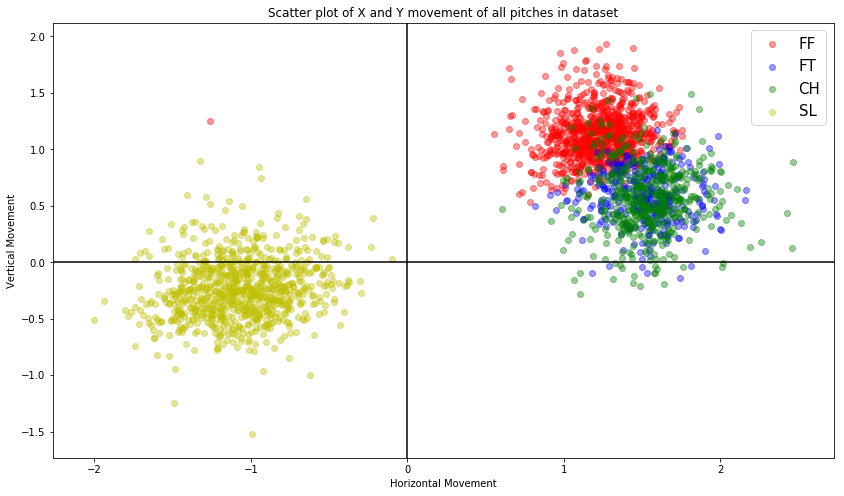

In [7]:
x1 = df_pitch['pfx_x'][df_pitch['pitch_type']=='FF']
y1 = df_pitch['pfx_z'][df_pitch['pitch_type']=='FF']
x2 = df_pitch['pfx_x'][df_pitch['pitch_type']=='FT']
y2 = df_pitch['pfx_z'][df_pitch['pitch_type']=='FT']
x3 = df_pitch['pfx_x'][df_pitch['pitch_type']=='CH']
y3 = df_pitch['pfx_z'][df_pitch['pitch_type']=='CH']
x4 = df_pitch['pfx_x'][df_pitch['pitch_type']=='SL']
y4 = df_pitch['pfx_z'][df_pitch['pitch_type']=='SL']
plt.scatter(x1, y1, alpha=.4, color='r', label = 'FF')
plt.scatter(x2, y2, alpha=.4, color='b', label = 'FT')
plt.scatter(x3, y3, alpha=.4, color='g', label = 'CH')
plt.scatter(x4, y4, alpha=.4, color='y', label = 'SL')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.xlabel('Horizontal Movement')
plt.ylabel('Vertical Movement')
plt.title('Scatter plot of X and Y movement of all pitches in dataset')

plt.legend(prop={'size': 15})
fig = plt.gcf()
fig.set_size_inches(14,8)

Using the positive portion of the x-axis as the starting point for calculating the angle would result in some pitches being classified with an extremely low angle, e.g. < 15°, and others being classified with an extremely high angle, e.g. > 345°. These pitches might be very similar in terms of their horizontal and vertical movement.  For this reason I will use the negative portion of the y-axis as my line of demarcation from which angle will be calculated.

To illustrate how the angle is calculated, let’s suppose Chris Sale threw a changeup that exhibited no vertical break, and positive horizontal break.  This pitch would thus lie on x-axis, and it’s break angle would be calculated at 90°.  Similarly if Chris Sale threw a slider that exhibited no vertical break, but had negative horizontal break, the break angle would be 270°.

In [8]:
#Calculate angle of vector for break
df_pitch['angle'] = 0

for i in range(len(df_pitch)):
    df_pitch['angle'].loc[i] = math.degrees(math.atan(abs(df_pitch['pfx_z'].loc[i])/abs(df_pitch['pfx_x'].loc[i])))

#Convert angle based on quadrant of vector
for i in range(len(df_pitch)):
    if df_pitch['pfx_x'].loc[i] < 0 and df_pitch['pfx_z'].loc[i] > 0:
        df_pitch['angle'].loc[i] = 270 - df_pitch['angle'].loc[i]
    elif df_pitch['pfx_x'].loc[i] < 0 and df_pitch['pfx_z'].loc[i] < 0:
        df_pitch['angle'].loc[i] = df_pitch['angle'].loc[i] + 270
    elif df_pitch['pfx_x'].loc[i] > 0 and df_pitch['pfx_z'].loc[i] > 0:
        df_pitch['angle'].loc[i] = df_pitch['angle'].loc[i] + 90
    elif df_pitch['pfx_x'].loc[i] > 0 and df_pitch['pfx_z'].loc[i] < 0:
        df_pitch['angle'].loc[i] = 90 - df_pitch['angle'].loc[i]

print df_pitch.head()
print "Expanded pitch dataset has {} samples with {} features each.".format(*df_pitch.shape)

  pitch_type  effective_speed  release_spin_rate  release_extension   pfx_x  \
0         FF           98.549             2368.0              6.252  1.0767   
1         FF           97.384             2414.0              6.103  1.2722   
2         FF           97.886             2432.0              5.969  1.3104   
3         FF           97.852             2468.0              6.337  1.1970   
4         FF           98.091             2299.0              6.068  1.1740   

    pfx_z     break       angle  
0  1.5664  1.900761  145.496445  
1  1.9309  2.312329  146.620561  
2  0.8905  1.584342  124.198597  
3  1.1911  1.688647  134.858446  
4  0.9266  1.495615  128.282884  
Expanded pitch dataset has 2592 samples with 8 features each.


Now that the dataset is complete, I want to explore each type of pitch a little more to get an idea of how they vary from one another.  By looking at the mean values for the 4 types of pitches Chris Sale thrown, namely 4-seam fastballs (“FF”), 2-seam fastballs (“FT”), changeups (“CH”) and sliders (“SL”), we can view the features for the average pitch of each type.  In addition to calculating these mean values, I also will plot a vector for each average pitch so we can see how the mean values of each pitch differ from one another.

In [9]:
#Average values for each pitch type
df_pitch_descriptions = pd.DataFrame(columns=['pitch_type', 'effective_speed', 'release_spin_rate', 'release_extension', 'pfx_x', 'pfx_z', 'break', 'angle'])

pitches = df_pitch['pitch_type'].unique()

for pitch in pitches:
    df = pd.DataFrame([df_pitch[df_pitch['pitch_type']==pitch].mean()])
    df['pitch_type'] = pitch
    df = df[['pitch_type', 'effective_speed', 'release_spin_rate', 'release_extension', 'pfx_x', 'pfx_z', 'break', 'angle']]
    df_pitch_descriptions = df_pitch_descriptions.append(df)
    
df_pitch_descriptions = df_pitch_descriptions[['pitch_type', 'effective_speed', 'release_spin_rate', 'release_extension', 'pfx_x', 'pfx_z', 'break', 'angle']]
df_pitch_descriptions=df_pitch_descriptions.reset_index(drop=True)
display(df_pitch_descriptions)


,pitch_type,effective_speed,release_spin_rate,release_extension,pfx_x,pfx_z,break,angle
0,FF,93.865353,2333.359179,6.051976,1.216422,1.138000,1.679170,133.041648
1,FT,92.798901,2221.997175,6.005661,1.512960,0.589692,1.640335,111.308417
2,CH,85.803525,2019.581712,6.013362,1.531059,0.576348,1.661655,110.365056
3,SL,77.776333,2383.880756,5.349344,-1.073473,-0.236222,1.130673,282.023726


In [12]:
#Calculate coordinates of velocity vector
df_vector = df_pitch_descriptions[['pitch_type', 'effective_speed', 'pfx_x', 'pfx_z']]
df_vector['velo_x'] = 0
df_vector['velo_y'] = 0
df_vector['adj_effective_speed'] = 0
df_vector['test']  = 0


#Scale the velocity down for illustrative purposes
for i in range(len(df_vector)):
    df_vector['adj_effective_speed'].loc[i] = df_vector['effective_speed'].loc[i] - 70


for i in range(len(df_vector)):
    df_vector['velo_x'].loc[i] = df_vector['adj_effective_speed'].loc[i] * math.cos(math.atan(abs(df_vector['pfx_z'].loc[i])/abs(df_vector['pfx_x'].loc[i])))
    df_vector['velo_y'].loc[i] = df_vector['adj_effective_speed'].loc[i] * math.sin(math.atan(abs(df_vector['pfx_z'].loc[i])/abs(df_vector['pfx_x'].loc[i])))
    if df_vector['pfx_x'].loc[i] < 0:
        df_vector['velo_x'].loc[i] = df_vector['velo_x'].loc[i] * -1
    if df_vector['pfx_z'].loc[i] < 0:
        df_vector['velo_y'].loc[i] = df_vector['velo_y'].loc[i] * -1


#Test the velocity vectors to make sure they are correct
for i in range(len(df_vector)):
    df_vector['test'].loc[i] = np.sqrt(((df_vector['velo_x'].loc[i]**2)+(df_vector['velo_y'].loc[i]**2)))

display(df_vector)

,pitch_type,effective_speed,pfx_x,pfx_z,velo_x,velo_y,adj_effective_speed,test
0,FF,93.865353,1.216422,1.138000,17.427778,16.304222,23.865353,23.865353
1,FT,92.798901,1.512960,0.589692,21.242423,8.279453,22.798901,22.798901
2,CH,85.803525,1.531059,0.576348,14.790301,5.567622,15.803525,15.803525
3,SL,77.776333,-1.073473,-0.236222,-7.594627,-1.671226,7.776333,7.776333


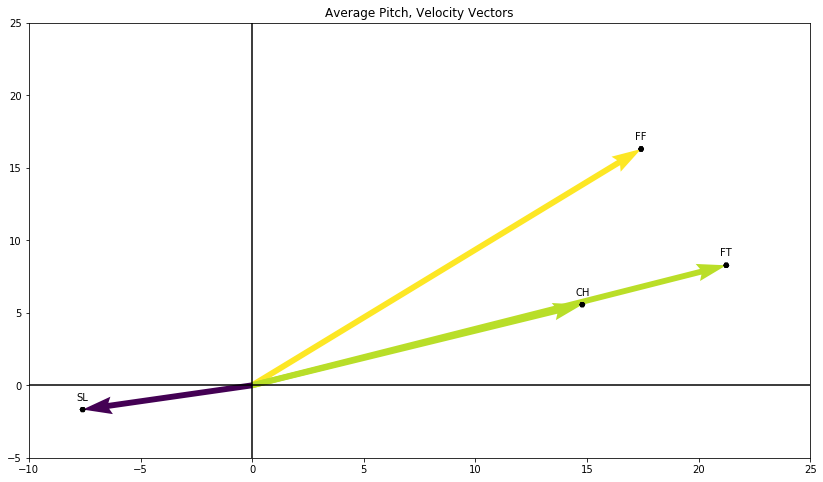

In [16]:
##### Create plot of velocity vectors to compare the pitches
soa = np.array([[0, 0, df_vector['velo_x'].loc[0], df_vector['velo_y'].loc[0]], [0, 0, df_vector['velo_x'].loc[1], df_vector['velo_y'].loc[1]], [0, 0, df_vector['velo_x'].loc[2], df_vector['velo_y'].loc[2]], [0, 0, df_vector['velo_x'].loc[3], df_vector['velo_y'].loc[3]]])
X, Y, U, V = zip(*soa)
plt.figure(figsize = (14,8))
ax = plt.gca()
Q1 = ax.quiver(X, Y, U, V, np.arctan2(V, U), angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-10, 25])
ax.set_ylim([-5, 25])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title("Average Pitch, Velocity Vectors")

plt.quiverkey(Q1, df_vector['velo_x'].loc[0], df_vector['velo_y'].loc[0], 0, 'FF', coordinates = 'data')
plt.quiverkey(Q1, df_vector['velo_x'].loc[1], df_vector['velo_y'].loc[1], 0, 'FT', coordinates='data')
plt.quiverkey(Q1, df_vector['velo_x'].loc[2], df_vector['velo_y'].loc[2], 0, 'CH', coordinates='data')
plt.quiverkey(Q1, df_vector['velo_x'].loc[3], df_vector['velo_y'].loc[3], 0, 'SL', coordinates='data')


plt.draw()
plt.show()

These vectors are merely to give an idea of what the average fastball, changeup and slider thrown by Chris Sale does.  Note: The effective_speed of each pitch was scaled down to illustrate the variance in speed more.  The length of the vector represents the adjusted effective speed and the angle of the vector is the angle the pitch typically breaks at.  There are a few things we can infer about each pitch based on the graph.

The first is that it looks like both types of fastballs and the changeup move “up”, but this doesn’t mean the ball is rising, in the traditional sense.  The horizontal and vertical movement of each pitch recorded is done so relative to a pitch thrown with no spin whatsoever and which is only affected by gravity (http://www.fangraphs.com/library/pitch-type-abbreviations-classifications/).  In this case, the 4-seam fastball, 2-seam fastball and changeup all have “positive” vertical movement in the sense that they do not exhibit the expected amount of drop due to gravity.
The second takeaway from this plot is the similarities and differences between each type of pitch.  The 4-seam has the highest average velocity and tends to have positive vertical and horizontal break.  The 2-seam fastball and changeup are very similar in terms of both break and velocity, however the 2-seam is typically thrown harder.  The slider Chris Sale throws is clearly the most unique of the pitch-mix: it is both the pitch with the lowest average velocity and the only one with “negative” movement.

Now that the dataset has been properly formatted and holds all features we are going to use, I will select a set of sample points which we will look at in the future once the cluster analysis has been completed.  I am primarily interested in how each pitch type is classified and whether the clustering algorithms can properly label each pitch type.  I will thereby randomly select 4 indices, each one classified as a different pitch type.

In [17]:
#Drop pitch type
df_labels = df_pitch['pitch_type']
df_features = df_pitch.drop('pitch_type', 1)

print df_labels.head()
print df_features.head()

0    FF
1    FF
2    FF
3    FF
4    FF
Name: pitch_type, dtype: object
   effective_speed  release_spin_rate  release_extension   pfx_x   pfx_z  \
0           98.549             2368.0              6.252  1.0767  1.5664   
1           97.384             2414.0              6.103  1.2722  1.9309   
2           97.886             2432.0              5.969  1.3104  0.8905   
3           97.852             2468.0              6.337  1.1970  1.1911   
4           98.091             2299.0              6.068  1.1740  0.9266   

      break       angle  
0  1.900761  145.496445  
1  2.312329  146.620561  
2  1.584342  124.198597  
3  1.688647  134.858446  
4  1.495615  128.282884  


In [18]:
#TODO: Select a random pitch of each type
FF = random.choice(list(df_pitch[df_pitch['pitch_type']=='FF'].index.values))
FT  = random.choice(list(df_pitch[df_pitch['pitch_type']=='FT'].index.values))
CH = random.choice(list(df_pitch[df_pitch['pitch_type']=='CH'].index.values))
SL = random.choice(list(df_pitch[df_pitch['pitch_type']=='SL'].index.values))

indices = [FF,FT,CH,SL]
sample_labels = ['FF','FT','CH','SL']

# Create a DataFrame of the chosen samples
samples = df_features.loc[indices]

print "Chosen samples of pitch dataset:"
display(df_pitch.loc[indices])

Chosen samples of pitch dataset:


,pitch_type,effective_speed,release_spin_rate,release_extension,pfx_x,pfx_z,break,angle
44,FF,96.917,2405.0,6.096,1.3481,1.3201,1.886806,134.398762
349,FT,95.071,2356.0,5.879,1.2343,0.5154,1.337585,112.663689
1473,CH,85.522,1996.0,5.523,2.0142,-0.0052,2.014207,89.852082
2412,SL,76.525,2317.0,5.357,-0.6585,-0.0959,0.665447,278.285962


### Section 5 - Feature Relevance

Now that we have explored the pitch dataset a bit, we can start to look closer at the different features to see how relevant they are to one another.  The first step in this process is to run a supervised regression algorithm on the dataset with a feature removed to view how well that feature can be predicted by the rest of the dataset.  First, I will attempt to predict the angle of break using a regressed decision tree.

In [19]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = df_features.drop('angle',1)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, df_features['angle'], test_size=.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor                                                                                        
regressor = DecisionTreeRegressor(random_state=42)
regressor = regressor.fit(X_train, y_train)
y_1 = regressor.predict(X_test)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print score

C:\Users\586574\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.999635406403


When the angle is attempted to be predicted, the dataset does so with a correlation coefficient of >.99, meaning that more than 99% of the variation in the angle can be determined by the rest of the dataset.  The angle can be predicted with incredible accuracy – which should be expected, as the angle was calculated using the information we already had.  So let’s try to predict another feature which wasn’t calculated, effective_speed.  Running the same test but on the effective speed of each pitch produces a correlation coefficient of >.83, again a very high number, which means the dataset can predict the velocity of each pitch with a high degree of accuracy.

In [20]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = df_features.drop('effective_speed',1)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, df_features['effective_speed'], test_size=.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor                                                                                        
regressor = DecisionTreeRegressor(random_state=42)
regressor = regressor.fit(X_train, y_train)
y_1 = regressor.predict(X_test)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print score

0.811149442946


Continuing with our exploration of the features in the dataset, I will create a scatter plot of each feature paired with every other feature to show how they are related to one another, as well as how each feature is distributed.

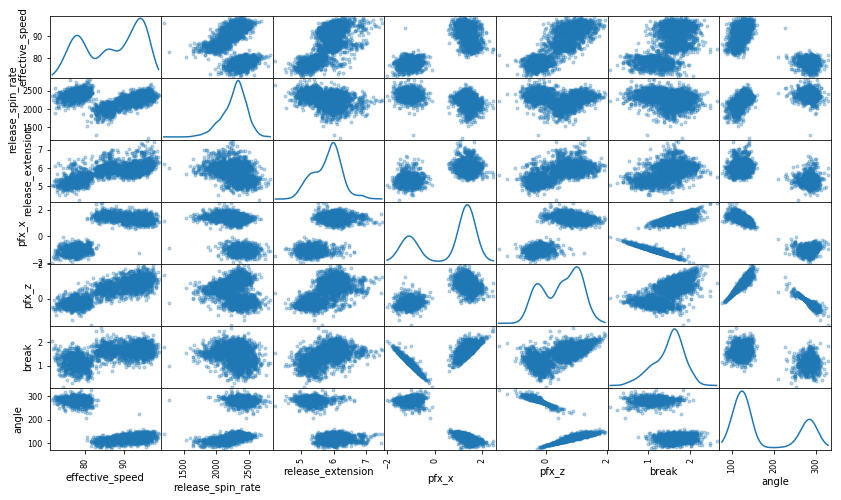

In [21]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(df_features, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

## Methodology
### Section 7 – Data Preprocessing

Now that we have analyzed the data closely and viewed the features, we can start the process of performing the clustering.  Prior to doing this the dataset needs to be preprocessed so it is in a format that the clustering algorithms can use.
The primary step in preprocessing is reducing the dimensionality of the dataset through principal component analysis.  Principal component analysis, per scikit-learn, is:

"used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. In scikit-learn, PCA is implemented as a transformer object that learns n components in its fit method, and can be used on new data to project it on these components."

Source: http://scikit-learn.org/stable/modules/decomposition.html#pca

Once we reduce the dataset to 2 dimensions, we can continue to explore the data.  The first thing to do is view how much variance is explained by each dimension calculated, which is shown below, as well as calculate the cumulative variance over all features.

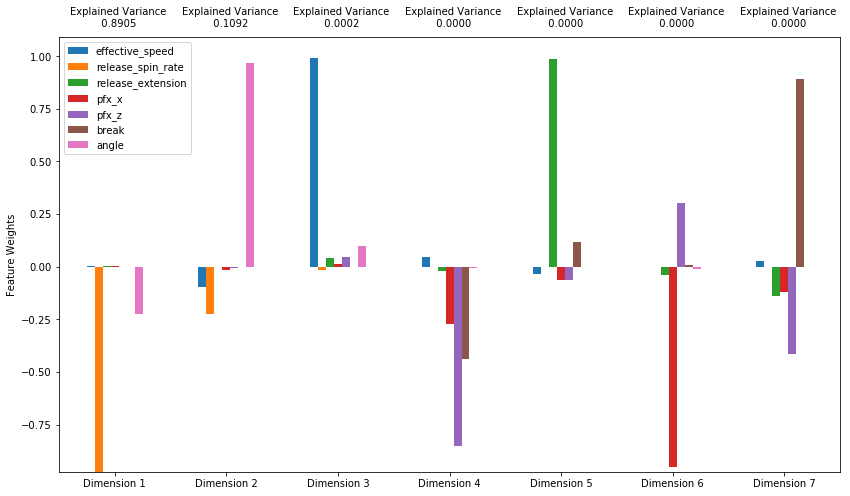

In [22]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=len(df_features.keys()))
pca.fit(df_features)

# Generate PCA results plot
pca_results = vs.pca_results(df_features, pca)

In [23]:
display(np.cumsum(pca.explained_variance_ratio_))

array([ 0.89049769,  0.99974325,  0.99999215,  0.9999949 ,  0.99999689,
        0.9999986 ,  1.        ])

We can to explore the newly reduced data through the construction of a biplot with the dimensions shown as vectors, and then a similar scatter plot but with pitch type identified to see where each pitch falls on our primary 2 dimensions.

In [24]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(df_features)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(df_features)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
reduced_data2 = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

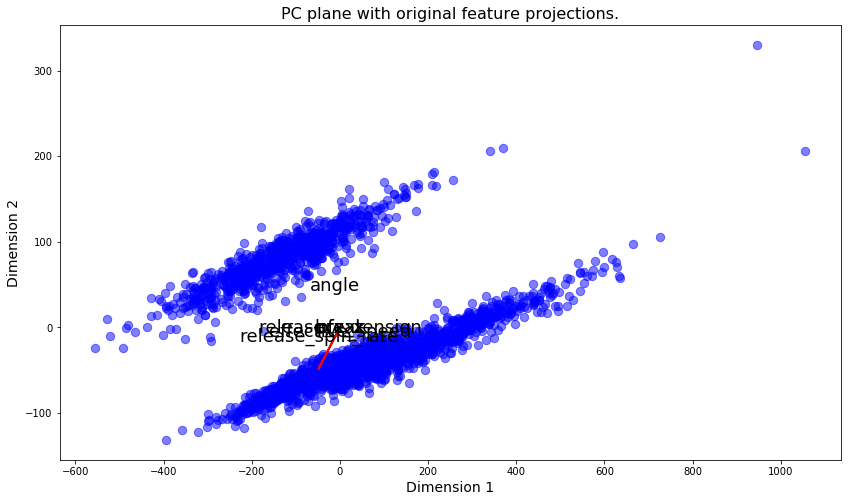

In [25]:
# Create a biplot
vs.biplot(df_features, reduced_data, pca)

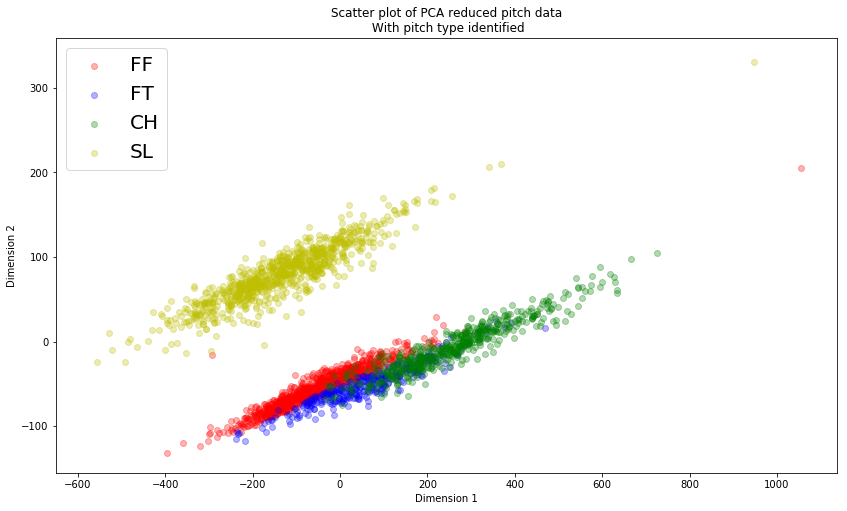

In [26]:
reduced_data2['pitch'] = df_labels

#fig, ax = plt.subplots()
x1 = reduced_data2['Dimension 1'][reduced_data2['pitch']=='FF']
y1 = reduced_data2['Dimension 2'][reduced_data2['pitch']=='FF']
x2 = reduced_data2['Dimension 1'][reduced_data2['pitch']=='FT']
y2 = reduced_data2['Dimension 2'][reduced_data2['pitch']=='FT']
x3 = reduced_data2['Dimension 1'][reduced_data2['pitch']=='CH']
y3 = reduced_data2['Dimension 2'][reduced_data2['pitch']=='CH']
x4 = reduced_data2['Dimension 1'][reduced_data2['pitch']=='SL']
y4 = reduced_data2['Dimension 2'][reduced_data2['pitch']=='SL']
plt.scatter(x1, y1, color='r', alpha = .3, label = 'FF')
plt.scatter(x2, y2, color='b', alpha = .3, label = 'FT')
plt.scatter(x3, y3, color='g', alpha = .3, label = 'CH')
plt.scatter(x4, y4, color='y', alpha = .3, label = 'SL')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter plot of PCA reduced pitch data\n With pitch type identified')

plt.legend(prop={'size': 20})
fig = plt.gcf()
fig.set_size_inches(14,8)

### Section 8 – Implementation

Now that the dataset has been preprocessed and examined, it is ready for the clustering algorithms.  I will first run each clustering algorithm on the dataset with 4 clusters, as we already know there are 4 pitch types.

Running a Gaussian Mixture model on the reduced data produces the following plot:

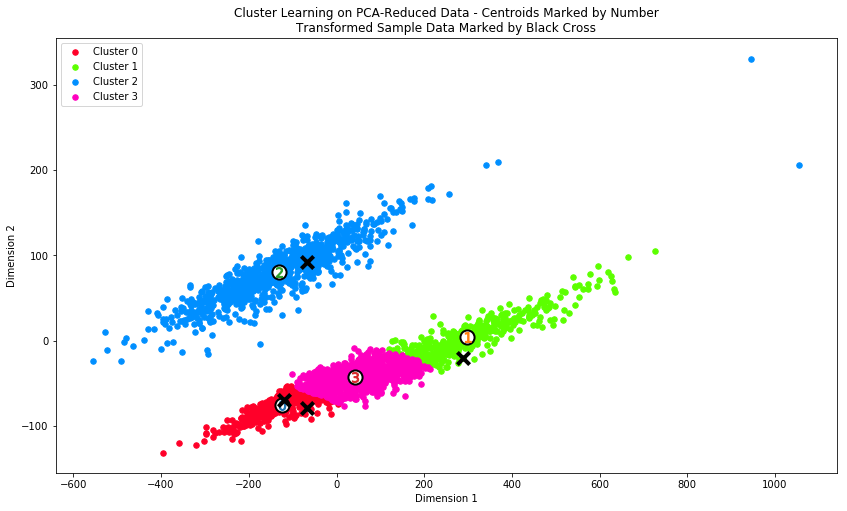

In [33]:
# Apply your clustering algorithm of choice to the reduced data
from sklearn import mixture
from sklearn.metrics import silhouette_score

# Create Gaussian mixture clustering model with 4 clusters for each of the 4 pitch classifications
clusterer = mixture.GMM(n_components=4, random_state=16)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)
score = silhouette_score(reduced_data, preds)

# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

And running the KMean algorithm, also with 4 clusters:

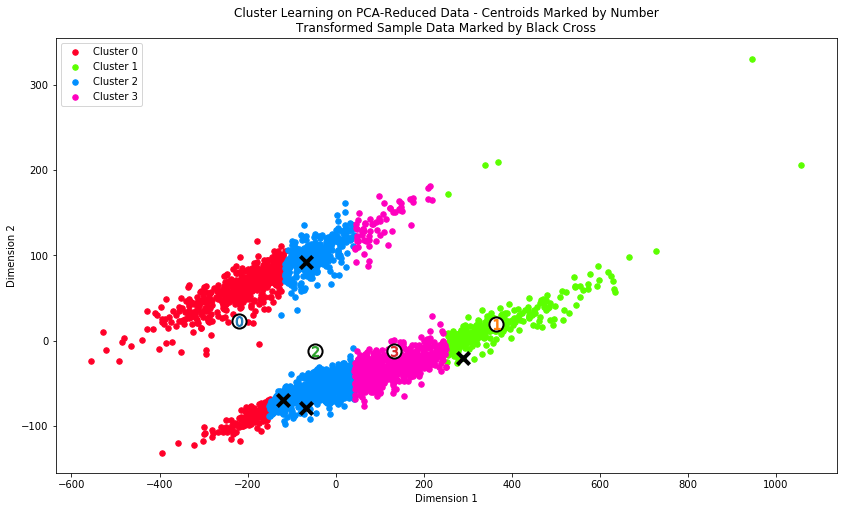

In [34]:
#Try KMeans
from sklearn.cluster import KMeans

# Create optimal clustering model
clusterer = KMeans(n_clusters=4, random_state=17)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)
score = silhouette_score(reduced_data, preds)

vs.cluster_results(reduced_data, preds, centers, pca_samples)

In the GMM plot, the 4 clusters are identified along with their centers, as well as the 3 sample points identified earlier.  This clustering algorithm does a decent job at labelling each pitch, with a few noted exceptions.  Sliders and changeups are classified very well, however the algorithm does not differentiate between the 2 fastball types well.

The KMeans clustering does not perform as well as the GMM clustering did.  The pitches are not differentiated properly, with sliders being classified into the same cluster as 4-seam fastballs, 2-seam fastballs and changeups.


For the next step in the analysis, I won’t provide the algorithms with the number of clusters ahead of time.  Instead, I will iterate the model with a different number of clusters and calculate the Silhouette score that results.  The Silhouette score, as defined by scikit-learn, is
composed of two scores:

a: The mean distance between a sample and all other points in the same class.

b: The mean distance between a sample and all other points in the next nearest cluster.


    Number of Clusters  Silhouette Score
0                  2.0          0.448474
1                  3.0          0.421087
2                  4.0          0.365387
3                  5.0          0.432597
4                  6.0          0.422287
5                  7.0          0.406529
6                  8.0          0.404671
7                  9.0          0.364691
8                 10.0          0.390580
9                 11.0          0.365753
10                12.0          0.369399
11                13.0          0.368016
12                14.0          0.341383
13                15.0          0.300969
14                16.0          0.327561
15                17.0          0.286499
16                18.0          0.291818
17                19.0          0.251621
18                20.0          0.252983
19                21.0          0.234761
20                22.0          0.217354
21                23.0          0.258416
22                24.0          0.261548
23              

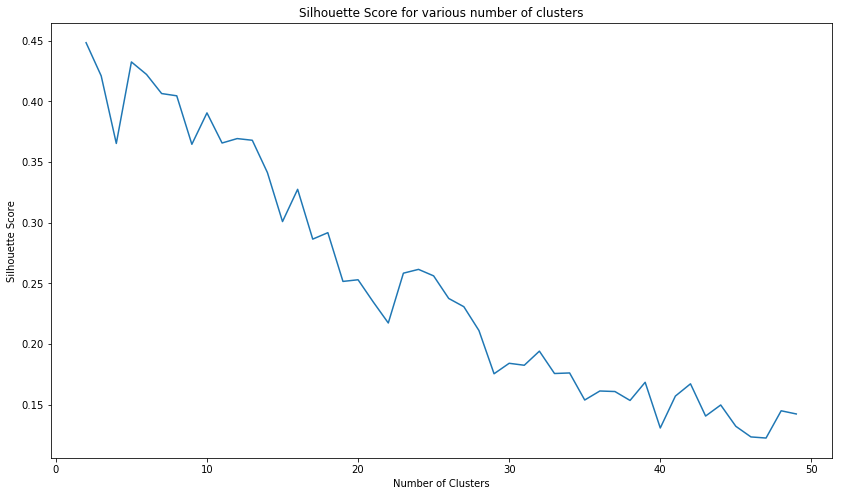

In [35]:
# Test several different values for the number of clusters
cluster_test = pd.DataFrame(columns=['Number of Clusters', 'Silhouette Score'])
for n in range(2,50):
    clusterer = mixture.GMM(n_components=n, random_state=16)
    clusterer.fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    score = silhouette_score(reduced_data, preds)
    cluster_test.loc[n-2] = n, score
print cluster_test

# Plot graph of different silhouette scores
plt.figure(figsize = (14,8))
plt.ylabel('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.title('Silhouette Score for various number of clusters')
plt.plot(cluster_test['Number of Clusters'], cluster_test['Silhouette Score'])

# Identify optimal number of clusters
num_components = int(cluster_test['Number of Clusters'][cluster_test['Silhouette Score'].argmax()])
op_score = float(cluster_test['Silhouette Score'][cluster_test['Number of Clusters'] == num_components])
print "Optimal number of clusters is {}, with a silhouette score of {}.".format(num_components, op_score)

# Create optimal clustering model
clusterer = mixture.GMM(n_components=num_components, random_state=16)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)
score = silhouette_score(reduced_data, preds)

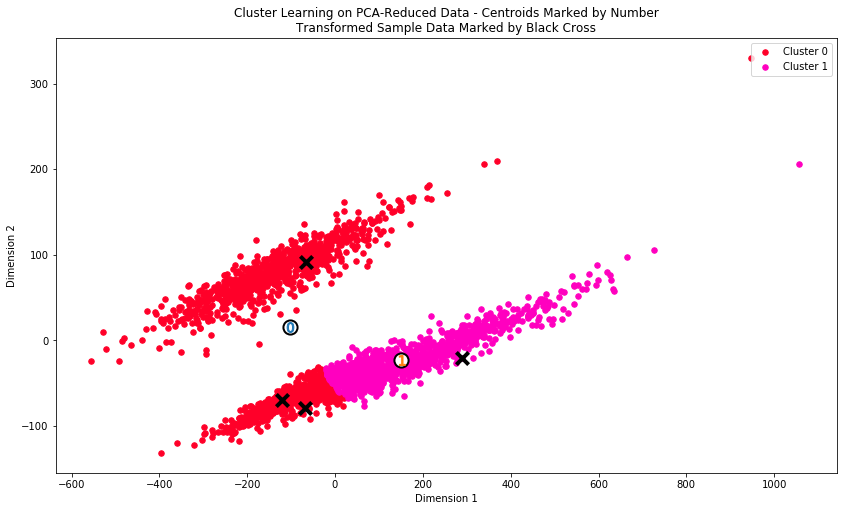

In [36]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

    Number of Clusters  Silhouette Score
0                  2.0          0.505310
1                  3.0          0.415921
2                  4.0          0.392624
3                  5.0          0.490137
4                  6.0          0.485284
5                  7.0          0.486384
6                  8.0          0.489827
7                  9.0          0.494698
8                 10.0          0.507777
9                 11.0          0.504261
10                12.0          0.490489
11                13.0          0.484611
12                14.0          0.479710
13                15.0          0.479260
14                16.0          0.472994
15                17.0          0.474132
16                18.0          0.471548
17                19.0          0.473679
18                20.0          0.469680
19                21.0          0.461465
20                22.0          0.453015
21                23.0          0.455710
22                24.0          0.446240
23              

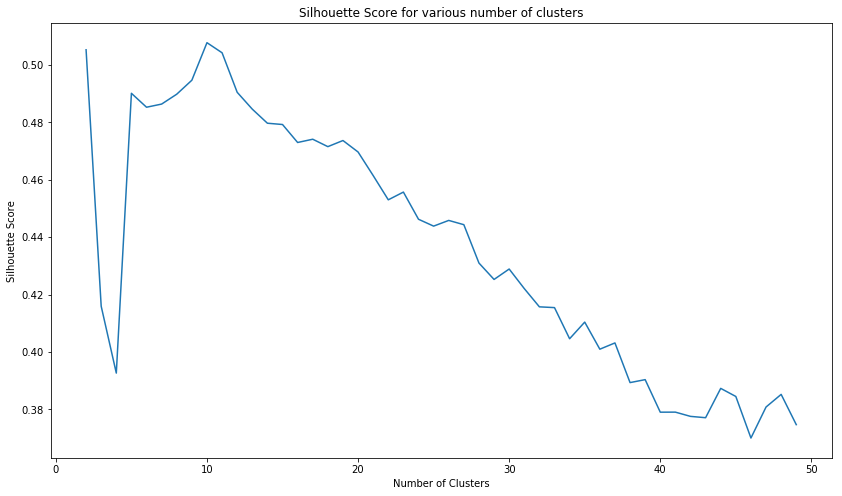

In [37]:
# Test several different values for the number of clusters
cluster_test = pd.DataFrame(columns=['Number of Clusters', 'Silhouette Score'])
for n in range(2,50):
    clusterer = KMeans(n_clusters=n, random_state=16)
    clusterer.fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    score = silhouette_score(reduced_data, preds)
    cluster_test.loc[n-2] = n, score
print cluster_test

# Plot graph of different silhouette scores
plt.figure(figsize = (14,8))
plt.ylabel('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.title('Silhouette Score for various number of clusters')
plt.plot(cluster_test['Number of Clusters'], cluster_test['Silhouette Score'])

# Identify optimal number of clusters
num_components = int(cluster_test['Number of Clusters'][cluster_test['Silhouette Score'].argmax()])
op_score = float(cluster_test['Silhouette Score'][cluster_test['Number of Clusters'] == num_components])
print "Optimal number of clusters is {}, with a silhouette score of {}.".format(num_components, op_score)

# Create optimal clustering model
clusterer = KMeans(n_clusters=num_components, random_state=16)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)
score = silhouette_score(reduced_data, preds)

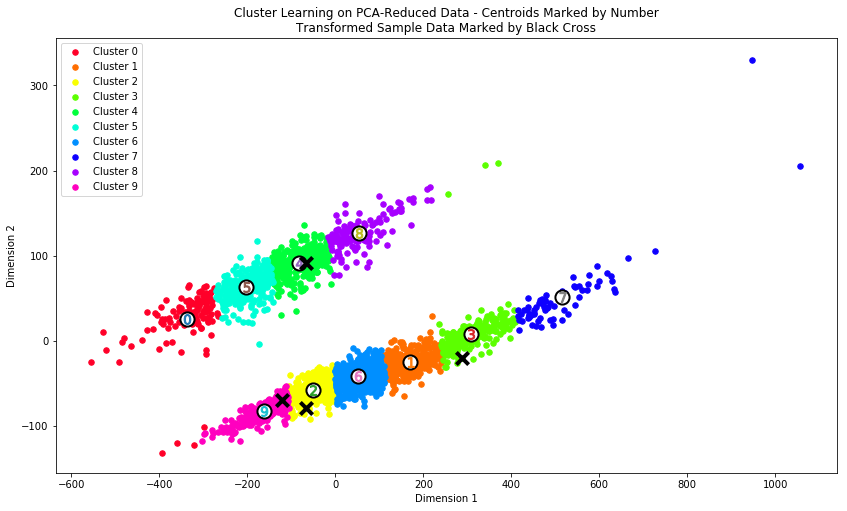

In [38]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

In [39]:
# Create optimal clustering model
clusterer = KMeans(n_clusters=10, random_state=16)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)
score = silhouette_score(reduced_data, preds)

# TODO: Inverse transform the centers
true_centers = pca.inverse_transform(centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = df_features.keys())
true_centers.index = segments
display(true_centers)

,effective_speed,release_spin_rate,release_extension,pfx_x,pfx_z,break,angle
Segment 0,82.0,2596.0,5.0,-1.0,0.0,1.0,275.0
Segment 1,90.0,2111.0,6.0,1.0,1.0,2.0,112.0
Segment 2,92.0,2336.0,6.0,1.0,1.0,2.0,130.0
Segment 3,88.0,1970.0,6.0,1.0,1.0,2.0,113.0
Segment 4,77.0,2333.0,5.0,-1.0,0.0,1.0,282.0
Segment 5,80.0,2456.0,5.0,-1.0,0.0,1.0,281.0
Segment 6,91.0,2231.0,6.0,1.0,1.0,2.0,123.0
Segment 7,85.0,1758.0,6.0,2.0,0.0,2.0,109.0
Segment 8,75.0,2192.0,5.0,-1.0,0.0,1.0,285.0
Segment 9,94.0,2449.0,6.0,1.0,1.0,2.0,131.0


## Results
### Section 9 – Model Evaluation and Validation

We know that the optimized GMM clustering model isn't correct in its determination that Chris Sale throws only 2 different types of pitches.  But is it possible the KMeans model is correct, and Sale actually throws closer to 10 pitches?  Let’s explore that model a little further.

First let's look at the characteristics of the cluster centers.  Let's also overlay the scatter plot of our reduced data with the pitches identified with the scatter plot of the reduced data after it has been clustered using KMeans, with 10 clusters.

In [40]:
# Cluster centers
display(true_centers)

,effective_speed,release_spin_rate,release_extension,pfx_x,pfx_z,break,angle
Segment 0,82.0,2596.0,5.0,-1.0,0.0,1.0,275.0
Segment 1,90.0,2111.0,6.0,1.0,1.0,2.0,112.0
Segment 2,92.0,2336.0,6.0,1.0,1.0,2.0,130.0
Segment 3,88.0,1970.0,6.0,1.0,1.0,2.0,113.0
Segment 4,77.0,2333.0,5.0,-1.0,0.0,1.0,282.0
Segment 5,80.0,2456.0,5.0,-1.0,0.0,1.0,281.0
Segment 6,91.0,2231.0,6.0,1.0,1.0,2.0,123.0
Segment 7,85.0,1758.0,6.0,2.0,0.0,2.0,109.0
Segment 8,75.0,2192.0,5.0,-1.0,0.0,1.0,285.0
Segment 9,94.0,2449.0,6.0,1.0,1.0,2.0,131.0


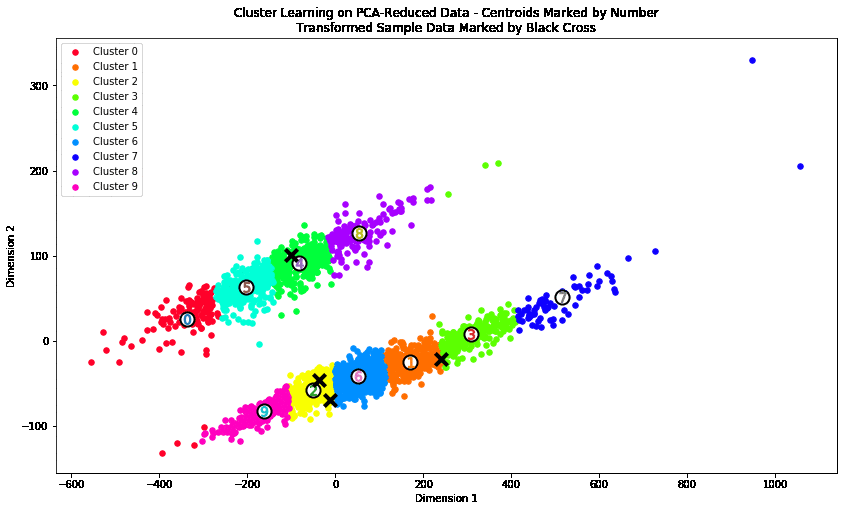

In [41]:
from IPython.display import Image
Image(filename="KMeans_cluster - Copy.gif.png")

If we are to separate his pitch type into a fastball-changeup group (FF-FT-CH) and a breaking pitch group (SL), we can see that his pitches really operate on a scale as oppose to four distinct types of pitches.  Segments 7, 1, 3, 6, 2 and 9 represent the scale for that first grouping of pitches, what I refer to as the fastball-changeup group.  This can be interpreted as a scale going from a true changeup (85 mph at 109°) to a true 4-seam fastball (94 mph at 130°).  The pitches between those two extremes are stops on that scale, with 2-seam fastballs, harder changeups and 4-seam fastballs making up that group.

The next group of cluster centers are the breaking ball variations Chris Sale throws.  Again, this can be interpreted as a scale, with a harder, tighter slider representing Segment 0 (82 mph at 275°) and a softer slider with more break (75 mph at 285°) representing Segment 8.

To illustrate these 10 different pitches even further, let’s plot the velocity vectors again, however instead of plotting the average velocity and break angle for each of Sale’s 4 pitch types, I will plot the velocity and break angle of the 10 cluster centers.

In [45]:
#Calculate coordinates of velocity vector
df_center_vectors = true_centers[['effective_speed', 'angle']]
df_center_vectors = df_center_vectors.iloc[:10]
df_center_vectors['velo_x'] = 0
df_center_vectors['velo_y'] = 0
df_center_vectors['adj_effective_speed'] = 0
df_center_vectors['test']  = 0

    

for i in df_center_vectors.index.values:
    df_center_vectors['adj_effective_speed'].loc[i] = df_center_vectors['effective_speed'].loc[i] - 70 #Scale velocity for illustrative purposes
    if df_center_vectors['angle'].loc[i] >= 90 and df_center_vectors['angle'].loc[i] < 180:
        df_center_vectors['velo_x'].loc[i] = df_center_vectors['adj_effective_speed'].loc[i] * math.cos(math.radians((df_center_vectors['angle'].loc[i]) - 90))
        df_center_vectors['velo_y'].loc[i] = df_center_vectors['adj_effective_speed'].loc[i] * math.sin(math.radians((df_center_vectors['angle'].loc[i]) - 90))
    if df_center_vectors['angle'].loc[i] >= 180 and df_center_vectors['angle'].loc[i] < 270:
        df_center_vectors['velo_x'].loc[i] = (-1) * (df_center_vectors['adj_effective_speed'].loc[i] * math.cos(math.radians(270 - (df_center_vectors['angle'].loc[i]))))
        df_center_vectors['velo_y'].loc[i] = df_center_vectors['adj_effective_speed'].loc[i] * math.sin(math.radians(270 - (df_center_vectors['angle'].loc[i])))
    if df_center_vectors['angle'].loc[i] >= 270 and df_center_vectors['angle'].loc[i] < 360:
        df_center_vectors['velo_x'].loc[i] = (-1) * (df_center_vectors['adj_effective_speed'].loc[i] * math.cos(math.radians((df_center_vectors['angle'].loc[i] - 270))))
        df_center_vectors['velo_y'].loc[i] = (-1) * (df_center_vectors['adj_effective_speed'].loc[i] * math.sin(math.radians((df_center_vectors['angle'].loc[i] - 270))))
    if df_center_vectors['angle'].loc[i] >= 0 and df_center_vectors['angle'].loc[i] < 90:
        df_center_vectors['velo_x'].loc[i] = df_center_vectors['adj_effective_speed'].loc[i] * math.cos(math.radians(90 - (df_center_vectors['angle'].loc[i])))
        df_center_vectors['velo_y'].loc[i] = (-1) * (df_center_vectors['adj_effective_speed'].loc[i] * math.sin(math.radians(90 - (df_center_vectors['angle'].loc[i]))))

#Test the velocity vectors to make sure they are correct
for i in df_center_vectors.index.values:
    df_center_vectors['test'].loc[i] = np.sqrt(((df_center_vectors['velo_x'].loc[i]**2)+(df_center_vectors['velo_y'].loc[i]**2)))


display(df_center_vectors)

,effective_speed,angle,velo_x,velo_y,adj_effective_speed,test
Segment 0,82.0,275.0,-11.954336,-1.045869,12.0,12.0
Segment 1,90.0,112.0,18.543677,7.492132,20.0,20.0
Segment 2,92.0,130.0,16.852978,14.141327,22.0,22.0
Segment 3,88.0,113.0,16.569087,7.033160,18.0,18.0
Segment 4,77.0,282.0,-6.847033,-1.455382,7.0,7.0
Segment 5,80.0,281.0,-9.816272,-1.908090,10.0,10.0
Segment 6,91.0,123.0,17.612082,11.437420,21.0,21.0
Segment 7,85.0,109.0,14.182779,4.883522,15.0,15.0
Segment 8,75.0,285.0,-4.829629,-1.294095,5.0,5.0
Segment 9,94.0,131.0,18.113030,15.745417,24.0,24.0


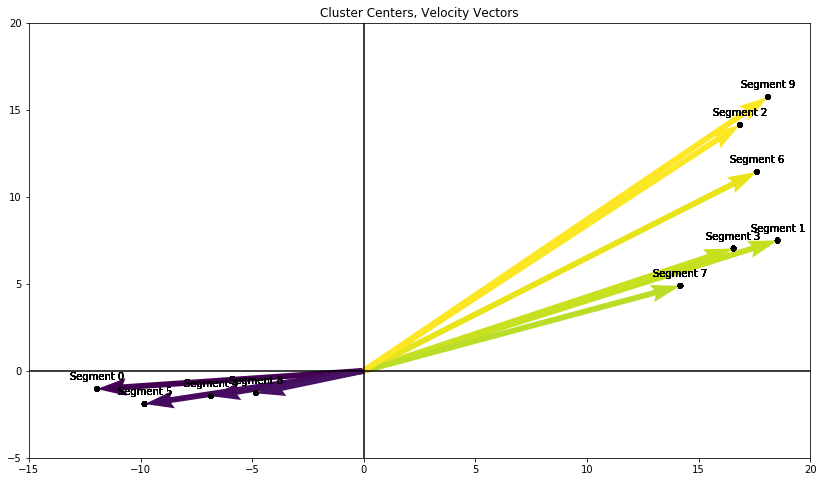

In [48]:
##### Create plot of velocity vectors to compare the pitches

soa = np.empty([1,4])
for i in df_center_vectors.index.values:
    soa = np.append(soa, np.array([[0, 0, df_center_vectors['velo_x'].loc[i], df_center_vectors['velo_y'].loc[i]]]), axis=0)

soa = soa[1:11]
X, Y, U, V = zip(*soa)
plt.figure(figsize = (14,8))
ax = plt.gca()
Q1 = ax.quiver(X, Y, U, V, np.arctan2(V, U), angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-15, 20])
ax.set_ylim([-5, 20])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title("Cluster Centers, Velocity Vectors")

for i in range(len(df_center_vectors)):
    plt.quiverkey(Q1, df_center_vectors['velo_x'].iloc[0], df_center_vectors['velo_y'].iloc[0], 0, 'Segment 0', coordinates = 'data')
    plt.quiverkey(Q1, df_center_vectors['velo_x'].iloc[1], df_center_vectors['velo_y'].iloc[1], 0, 'Segment 1', coordinates = 'data')
    plt.quiverkey(Q1, df_center_vectors['velo_x'].iloc[2], df_center_vectors['velo_y'].iloc[2], 0, 'Segment 2', coordinates = 'data')
    plt.quiverkey(Q1, df_center_vectors['velo_x'].iloc[3], df_center_vectors['velo_y'].iloc[3], 0, 'Segment 3', coordinates = 'data')
    plt.quiverkey(Q1, df_center_vectors['velo_x'].iloc[4], df_center_vectors['velo_y'].iloc[4], 0, 'Segment 4', coordinates = 'data')
    plt.quiverkey(Q1, df_center_vectors['velo_x'].iloc[5], df_center_vectors['velo_y'].iloc[5], 0, 'Segment 5', coordinates = 'data')
    plt.quiverkey(Q1, df_center_vectors['velo_x'].iloc[6], df_center_vectors['velo_y'].iloc[6], 0, 'Segment 6', coordinates = 'data')
    plt.quiverkey(Q1, df_center_vectors['velo_x'].iloc[7], df_center_vectors['velo_y'].iloc[7], 0, 'Segment 7', coordinates = 'data')
    plt.quiverkey(Q1, df_center_vectors['velo_x'].iloc[8], df_center_vectors['velo_y'].iloc[8], 0, 'Segment 8', coordinates = 'data')
    plt.quiverkey(Q1, df_center_vectors['velo_x'].iloc[9], df_center_vectors['velo_y'].iloc[9], 0, 'Segment 9', coordinates = 'data')


plt.draw()
plt.show()

This is Chris Sale’s true pitch repertoire, as determined by KMeans.  He throws one type of breaking pitch, a slider, but by varying the velocity and break of that pitch, can attack the hitter with 4 different variations of that pitch.  The same is true for his fastball-changeup combination.  He throws a 4-seam, 2-seam, and changeup, but by again varying the velocity and break, can turn that 3-pix mix into a 6-pitch mix.

Finally, let’s go back to our samples we chose at the beginning of this process.  I randomly chose 1 pitch of each type from the dataset, and we can look at the characteristics of those samples as well as what cluster they were assigned to.

In [ ]:
# Display the predictions
df_samples_clusters = df_pitch.loc[indices].reset_index(drop=True)

df_samples_clusters['cluster'] = 0

for i in range(len(df_samples_clusters)):
    df_samples_clusters['cluster'].loc[i] = sample_preds[i]
     

for i, pred in enumerate(sample_preds):
    print "Sample point", i,"(", sample_labels[i],")", "predicted to be in Cluster", pred

print display(df_samples_clusters)

The first sample is a 4-seam fastball which was assigned to cluster 2.  Cluster 2 is an interesting cluster, because it contains pitches labelled as 4-seam fastballs, 2-seam fastballs and some changeups, with a velocity of 92 mph and a break angle of 130°.  Relative to the cluster center, this pitch was thrown harder and with a larger break angle.

The second sample is the 2-seam fastball, also assigned to cluster 2.  With a velocity of just over 92 mph and a break angle of 109°, which is roughly as fast as the cluster center in cluster 2 however it breaks at a lower angle.

The third sample is the changeup, with a velocity of 85 mph and an angle of 99°, and it was assigned to cluster 1.  The center of cluster 1 had a velocity of 90 mph and an angle of 112°, so this particular pitch was thrown with less velocity and had a larger break angle.

The final sample is the slider, which was thrown at 75 mph and had 294° of break.  It was assigned to cluster 0, which had a center point with a velocity of 77 mph and a break angle of 282°, so this pitch was thrown slightly lower speed but at a slightly greater angle.